In [255]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import h5py

In [192]:
X , y = make_blobs(n_features=2,centers=2,random_state=0)
y = y.reshape((y.shape[0],1))

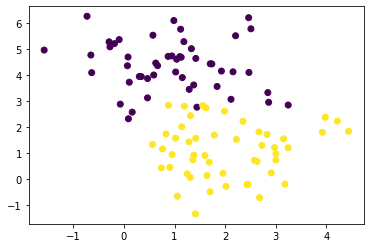

In [193]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [194]:
def initialize(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return W,b

In [236]:
W,b = initialize(X)

[1.47681395]


In [196]:
def Model(X,W,b):
    Z = X.dot(W) + b
    A = 1 /( 1+np.exp(-Z) )
    return A

In [197]:
A = Model(X,W,b)
print(A)

[[0.00170426]
 [0.20633026]
 [0.07748858]
 [0.20008327]
 [0.00979783]
 [0.03612666]
 [0.02865762]
 [0.00210764]
 [0.05064283]
 [0.16430173]
 [0.03788725]
 [0.08265202]
 [0.01249709]
 [0.07626664]
 [0.04267523]
 [0.00162158]
 [0.02269093]
 [0.07233409]
 [0.24443066]
 [0.08692017]
 [0.01850008]
 [0.03830721]
 [0.0498343 ]
 [0.06583199]
 [0.02838793]
 [0.02473388]
 [0.16495016]
 [0.01015858]
 [0.01340194]
 [0.01641702]
 [0.05535179]
 [0.02142987]
 [0.15807152]
 [0.0539359 ]
 [0.02960557]
 [0.00732555]
 [0.10103538]
 [0.02060327]
 [0.01374221]
 [0.19520615]
 [0.18211809]
 [0.0019088 ]
 [0.07060352]
 [0.02457975]
 [0.0664631 ]
 [0.02799421]
 [0.09179754]
 [0.14272107]
 [0.1368818 ]
 [0.02273345]
 [0.07580299]
 [0.17328959]
 [0.00158967]
 [0.01213012]
 [0.00395172]
 [0.01888376]
 [0.00595498]
 [0.07983371]
 [0.01350732]
 [0.05413842]
 [0.06967174]
 [0.00950813]
 [0.05451428]
 [0.01734044]
 [0.01038053]
 [0.03053807]
 [0.10089158]
 [0.00494268]
 [0.00904533]
 [0.01459277]
 [0.02995096]
 [0.11

In [198]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [199]:
print(log_loss(A,y))

1.6101774285699872


In [241]:
def Gradient(A,X,y):
    Dw = ( 1 / len(y) )* np.dot( X.T , (A-y) )
    Db = ( 1 / len(y) ) * np.sum( A-y )
    return Dw,Db

In [242]:
Dw,Db = Gradient(A,X,y)

In [243]:
def Update(W,b,Dw,Db,learning_rate):
    W = W - learning_rate*Dw
    b =  b - learning_rate * Db
    return W,b

def predict(X, W, b):
    A = Model(X, W, b)
    # print(A)
    return A >= 0.5    

In [250]:
def artificial_neuron(X,y,learning_rate=0.1,num_iter=100):
    W,b = initialize(X)
    Loss = []
    for i in range(num_iter):
         A = Model(X,W,b)
         Loss.append(log_loss(A,y))
         Dw,Db = Gradient(A,X,y)
         W,b=Update(W,b,Dw,Db,learning_rate)  
    #y_pred = predict(X,W,b)
    #print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    x0 = np.linspace(-1,4,100)
    x1 =  (-W[0]*x0 - b)/W[1]
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.plot(x0,x1,c='orange',lw=3)
    plt.show()
    

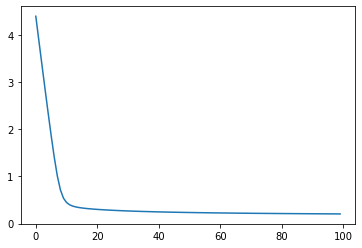

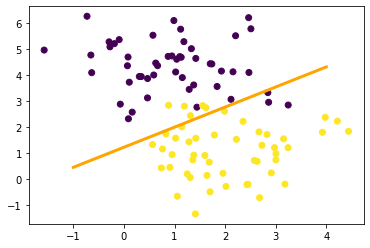

In [251]:
artificial_neuron(X,y)

In [259]:
def load_data():
    train_dataset = h5py.File('./datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:])
    y_train = np.array(train_dataset["Y_train"][:]) 
    test_dataset = h5py.File('./datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) 
    y_test = np.array(test_dataset["Y_test"][:]) 
    return X_train, y_train, X_test, y_test

In [267]:
X_train, y_train, X_test, y_test = load_data()
print(X_train.shape)
print(y_train.shape)

(1000, 64, 64)
(1000, 1)


In [263]:
def artificial_neuron_image(X,y,learning_rate=0.1,num_iter=100):
    W,b = initialize(X)
    Loss = []
    for i in range(num_iter):
         A = Model(X,W,b)
         Loss.append(log_loss(A,y))
         Dw,Db = Gradient(A,X,y)
         W,b=Update(W,b,Dw,Db,learning_rate)  

In [266]:
#artificial_neuron_image(X_train,y_train)